# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID: 2019121004, 2018102002 <br>
YOUR-NAME: Avani Gupta, Sreeharsha Paruchuri  <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show('Levenberg–Marquardt')

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gradient Descent converged at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            converged = 1
            break
    if(converged==0):
        print("gradient descent algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gradient Descent")
    return yPredicted,np.array(loss_arr)

def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    converged = 0
    iterations = 1000
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Gauss Newton converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            converged = 1
            break
    if(converged==0):
        print("Gauss Newton Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
    return yPredicted,np.array(loss_arr)
def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    iterations = 1000
    loss_arr = []
    converged = 0
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr+1e-30))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss <= squaredDistance:
                lr /= 1.1
            else:
                lr *= 1.1
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr)+1e-30)@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Levenberg–Marquardt converges at iteration ",i)
            print("loss:",squaredDistance)
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#             plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            converged = 1
            
            break
    if(converged==0):
        print("The Levenberg–Marquardt Algorithm didn't converge in ",i," iterations for given parameters of tolerance",tolerance," learning rate",lr)
        print("loss:",squaredDistance)
        print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
#         plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
    return yPredicted,np.array(loss_arr)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


In [3]:
def combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(lgd,'r--',label = 'Gradient Descent')
    plt.plot(lgn,'m.',label = 'Gauss Newton')
    plt.plot(llm,'g-',label = 'Levenberg–Marquardt')
    plt.title('loss vs number of iterations')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(xObserved,yObserved,'b.',label='Ground Truth')
    plt.plot(xObserved,ygd,'r',label = 'Gradient Descent')
    plt.plot(xObserved,ygn,'m',label = 'Gauss-Newton')
    plt.plot(xObserved,ylm,'g',label = 'Levenberg–Marquardt')
    plt.title('Combined Data and fit plot')
    plt.legend()
    plt.show()
    

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


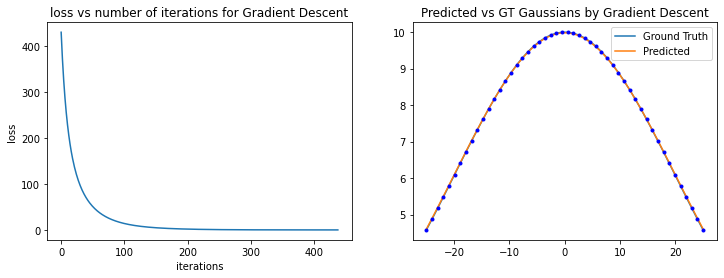

Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192


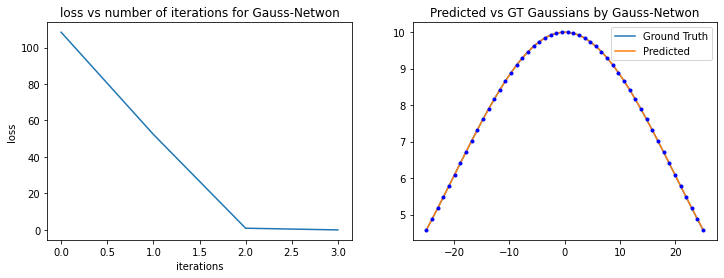

Levenberg–Marquardt converges at iteration  12
loss: 0.008238131064722001
a_est: 9.984891281369805  m_est: 4.596149701671068e-05  s_est: 20.082023707540458


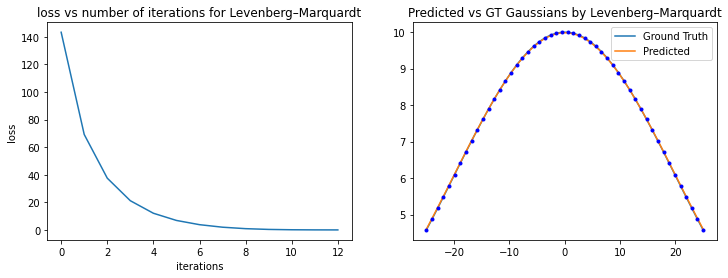

In [4]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")
ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
plot(xObserved,yObserved, ygn, lgn,"Gauss-Netwon")
ylm,llm = LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
plot(xObserved,yObserved, ylm, llm,"Levenberg–Marquardt")




##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

From the above graphs we can see that for the parameters that Gradient descent performs poorly when compared to the other two. This is observable from the number of iterations taken for each algorithm to converge. The graph for Gradient descent is on another scale. This demonstrates the superiority of the other two optimisation methods to gradient descent. <br/> <br/>
While for the given set of initialisations, Gauss newton outperforms gradient descent, this observation is extended for other initialisations as well. Gauss newton is able to converge to the local minima faster than gradient descent as it assumes that each funcion is locally quadratic.<br/><br/>
Sadly, that comes with it's own drawbacks, this involves knowledge obtained from the second derivate, computation of which is very intensive and thus proves to be rather infeasible.
This is where the Levenberg–Marquardt algorithm comes into its own. When far away from a minima, it acts like a gradient descent optimisation method. This is feasible thanks to its low computation cost. As the parameters converge to the minima, the Levenberg–Marquardt algorithm uses the Gauss Newton optimisation algorithm to find the minima.

# Optimising Gradient descent parameters

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


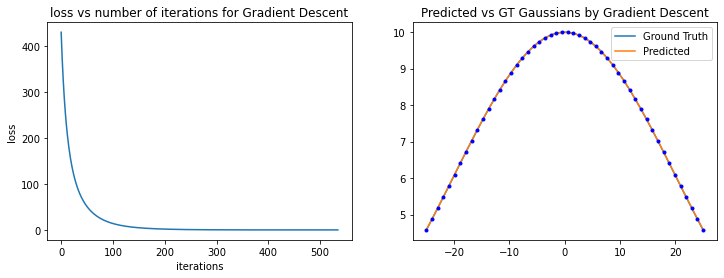

In [5]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-3)
plot(xObserved,yObserved,ygd, lgd,"Gradient Descent")

Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325


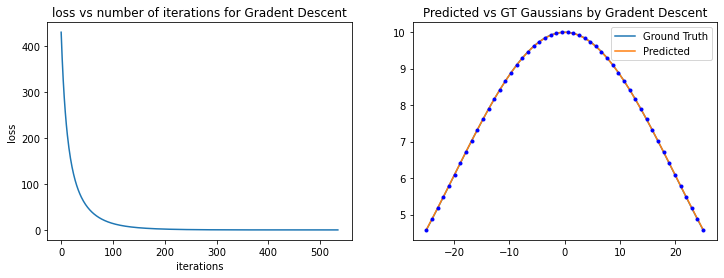

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


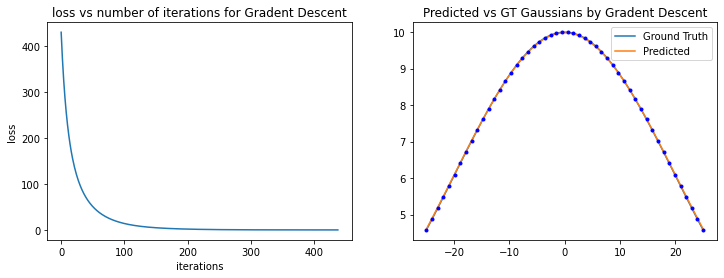

Gradient Descent converged at iteration  337
loss: 0.09899244775254672
a_est: 9.948877534392215  m_est: 0.006139702817200705  s_est: 20.288135634862776


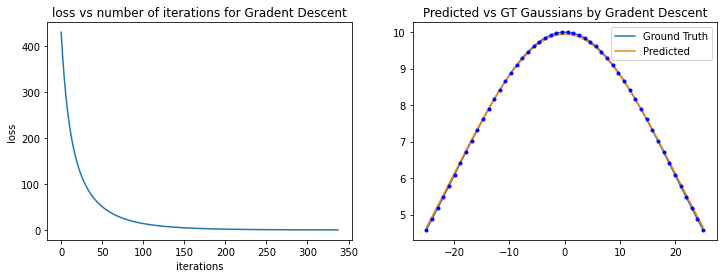

Gradient Descent converged at iteration  229
loss: 0.9871879843820822
a_est: 9.840596816487373  m_est: 0.10601728929519547  s_est: 20.93342186690136


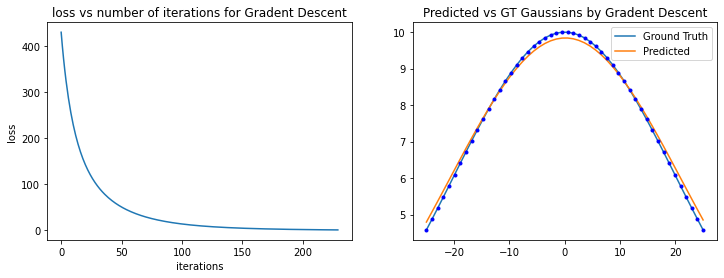

Gradient Descent converged at iteration  115
loss: 9.829260268328731
a_est: 9.608692938123435  m_est: 1.4171677571178727  s_est: 22.522468934557253


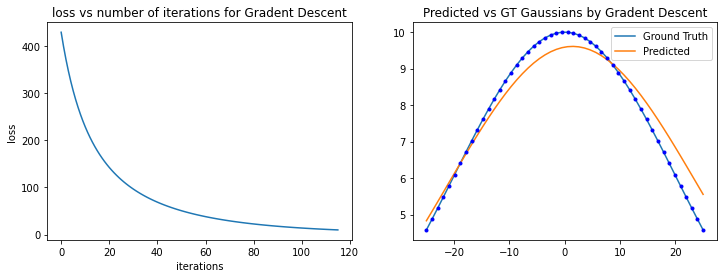

Gradient Descent converged at iteration  30
loss: 96.50726091112924
a_est: 9.640735602761751  m_est: 6.91689953829249  s_est: 22.826981339510326


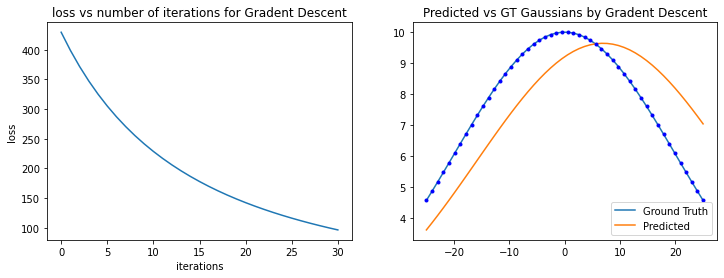

In [6]:
tolerance = [1e-3,1e-2,1e-1,1,1e+1,1e+2]
for t in tolerance:
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,t)
    plot(xObserved,yObserved,ygd, lgd,"Gradent Descent")

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.0001
loss: 244.48737461270264
a_est: 9.918497561085035  m_est: 10.42188691583679  s_est: 21.134393038947387


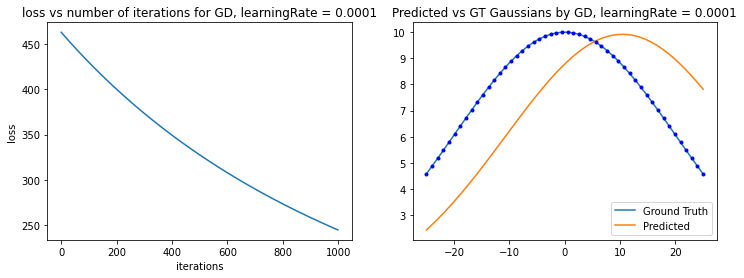

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.001
loss: 14.123791568974372
a_est: 9.582518592742808  m_est: 1.9573486106891116  s_est: 22.74004930353681


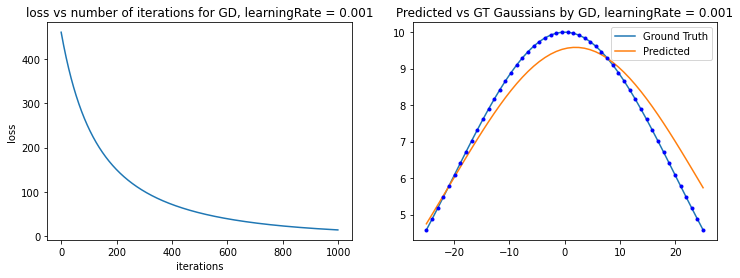

Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


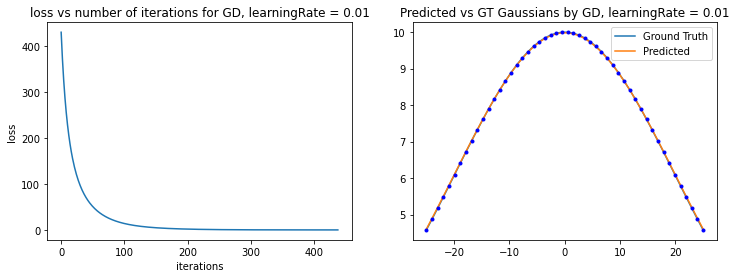

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 0.1
loss: 3226.679414252767
a_est: -125.51620545318187  m_est: 80.49221057521616  s_est: -9.042245279619415


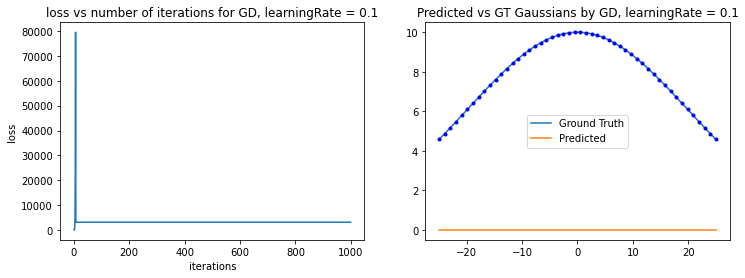

gradient descent algorithm didn't converge in  999  iterations for given parameters of tolerance 0.01  learning rate 1.0
loss: 251.12364291814873
a_est: 440142.66885355505  m_est: -167867.68666039224  s_est: -36167.47894579422


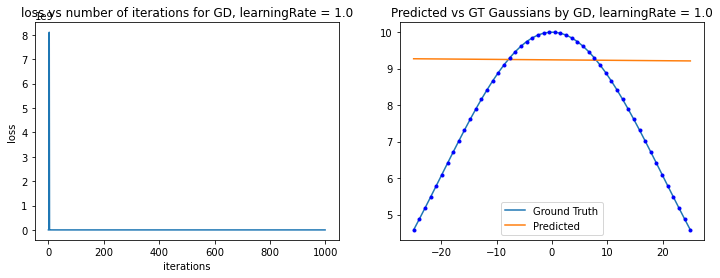

In [7]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1])

for l in learningrate:
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-2)
    plot(xObserved,yObserved,ygd, lgd,"GD, learningRate = "+str(l))

As we see on increasing tolerance the algorithm converges in a lower number of iterations but the L2 loss increases. 

Setting initial learning rate for LM as 10, from experimentations(on reducing it doesnt converge(explanable since learning rate is multiplied or divided by 10 depending on error is reduced or increased)

# Comparing among the 3 algorithms 


 tolerance  0.001
Gradient Descent converged at iteration  534
loss: 0.000983315055940316
a_est: 9.994903832848399  m_est: 2.461133127015614e-05  s_est: 20.02827347657325
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  14
loss: 0.00025637544469674073
a_est: 9.997162409814843  m_est: -1.2120134451566646e-08  s_est: 20.014321329594235


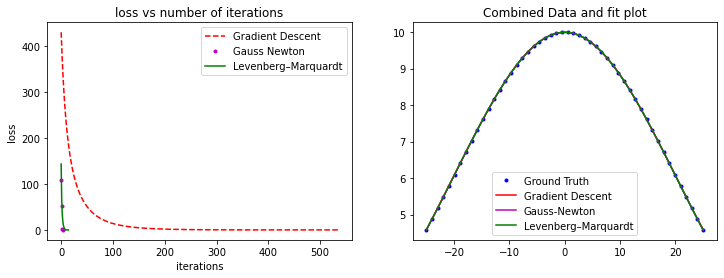


 tolerance  0.01
Gradient Descent converged at iteration  437
loss: 0.00983855224832958
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823
Gauss Newton converges at iteration  3
loss: 6.229699393620347e-05
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192
Levenberg–Marquardt converges at iteration  12
loss: 0.008238131064722001
a_est: 9.984891281369805  m_est: 4.596149701671068e-05  s_est: 20.082023707540458


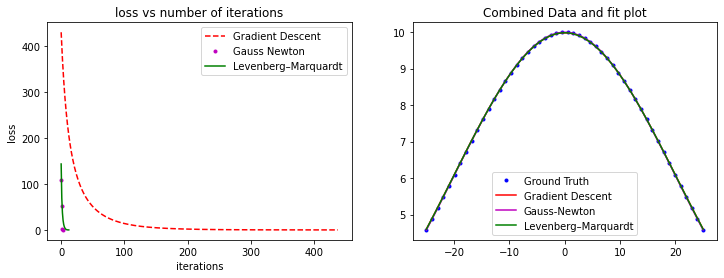

In [ ]:

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
tolerance = np.array([1e-3,1e-2,1e-1,1,1e+1,1e+2])
for tol in tolerance:
    print("\n tolerance ",tol)
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,tol)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,tol)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


## Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
Yes, the Gauss newton algorithm converges for initial estimates which are relatively far from the Ground Truth.

In [ ]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)


Observation: Gauss newton is able to handle really far off estimates well, Gradient descent too handles those estimates to some extent. But LM is not able to handle far off estimations <br>
Note: the first graph seems to be shooting out of scale just because the LM algorithm hasn't converged and thus overshot to large values. The Gradient Descent and Gauss Newton algorithms converge.

## Different number of observations: Can a particular algorithm handle very less observations?
Amongst the three, the LM and Gauss Newton algorithms can handle a --relatively-- low number of observations whereas Gradient Descent needs a --relatively-- large number of observations.

In [ ]:
numberOfObservations = np.array([3,5,8,10,12,15,20,22,25,28,30,34,38,42,48,50,52,55,60])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

## Add noise to your observations: Can a particular algorithm handle large noise?
Gauss newton can handle noisy data better than the other two.

In [ ]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,10,1e-2)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)
    

For higher levels of white noise , none converge. For low and medium noise only Gauss Newton converges, given learning rate and tolerance kept fixed for convergence on initial conditions of no noise.

## Different Learning rates

In [ ]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])
learningrate = np.array([0.0001,0.001,0.01,0.1,1,2,3,4,5,8,10])

for l in learningrate:    
    ygd,lgd = gradDescent(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ygn,lgn = gaussNewton(xObserved,yObserved,calculatedPrameters,l,1e-1)
    ylm,llm= LM(xObserved,yObserved,calculatedPrameters,l,1e-1)
    combinedplot(xObserved,yObserved,ygd,lgd,ygn,lgn,ylm,llm)

We see now that Levenberg–Marquard converges in equal iterations or less iterations as Gauss Newton on larger learning rates whereas gradient descent takes comparatively large number of iterations

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
We experiment intensively as shown in figures shown above and report some of our experimentations. <br>
**observed trends** <br> 1) If the learning rate is too high or too small, theGradient descent algorithm doesnt converge. <br>
Explanation: With a small learning rate, the Gradient Descent algorithm is prone to taking a long time to converge and thus won't converge in the given upper bound on iterations. If we use too large a learning rate, the gradient descent algorithm is prone to overshooting the minima. <br>
2)Decrease in tolerance results in decrease in loss and number of iterations<br>
Explnation: False, a decrease in tolerance would lead to a decrease in loss as there's a smaller acceptable RMSE value but that wouldn't lead to a decrease in the number of iterations as to achieve such stringent conditions, the algorithm needs to run further iterations.


| Learning rate        | tolerance           | loss  |num of iterations to converge |
| ------------- |:-------------:| -------:|-------:|
| 0.01    | 1e-2     | 0.0098 |437 |
| 0.01    | 1e-1    | 0.098 |337 |
| 0.1    | 1e-2     | 0.0098|437 |
| 1    | 1e-1    | 0.098 |337 |
| 0.0001    | 1e-2   | 244.49(at iter 999) |didn't converge in 999 iterations |
| 0.001    | 1e-2  | 14.12(at iter 999)|didn't converge in 999 iterations |
| 0.01    | 1e-2    | 0.0098 |437 |
| 0.1    | 1e-2  | 3226.67(at iter 999) |didn't converge in 999 iterations |
| 1   | 1e-2   | 251.123(at iter 999) |didn't converge in 999 iterations |

### Answer for 1.2
**Learning rate** 0.01 for Gradient Descent and Gauss Newton,
10 for LM <br>
**Tolerance** 1e-2 for Gradient Descent, Gauss Newton and LM <br>
* The Gradient Descent, Gauss Newton and LM converge for above values of learning rate and toleracne in given extimate of  s_gt = 20, a_est = 10, m_est = 13, s_est = 19.12 and 50 observations. <br>
* The learning rate and tolerance kept fixed otherwise explicitly mentioned for below experimentations in order to find a good comparison of changes from initial convergence.  Also in row (for Different initial estimate say) only that row's mentioned change is there, rest all params are kept fixed. <br>
* Please check learning rate's stats printed along with graphs just above the cell(not reporting the same for sake of conveniance of comparison in table)

| Action      |  Gradient Descent          | Gauss Newton  |LM   |
| ------------- |:-------------:| -------:|-------:|
| #Iterations(for tolerance 1e-2) | 437(loss: 0.0098)    | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1e-1) | 337(loss: 0.098)   | 3(loss: ~0)|  doesnt converge |
| #Iterations(tolerance 1) | 229(loss:0.987)   | 2(loss: 0.933)|  doesnt converge |
| #Iterations(tolerance 1e+1) | 115 (loss: 9.829)   | 2(loss: 0.933)|  2(loss: 5.73) |
| Different Initial estimate: far different   | doesn't converge     | converges|doesn't converge |
| bit different |converges| converges|doesnt converge|
| Different number of observations: v small(<5)  | doesn't converge     | converges|converges |
| small(<=20) |doesn't converge | converges|converges|
| medium(<=42) |doesn't converge | converges|converges|
| large(>=48) |converges | converges|converges|
| on adding small noise  | doesn't converge     | converges|doesn't converge |
| on adding medium noise  | doesn't converge     | converges|doesn't converge |
| on adding large noise  | doesn't converge     | doesnt converges|doesn't converge |




Please check graphs and observations demostrated in cells above<br>
*Some more observations*
* the Gauss-Newton method typically converges much faster than gradient-descent methods.
* The Levenberg-Marquardt method acts more like a gradient-descent method when the parameters are far from their optimal value, and acts more like the Gauss-Newton method when the parameters are close to their optimal value.
* On varying initial estimates, number of observations and addition of noise Gauss newton is seen to perform well. 
* Gradient descent is not able to converge on small number of observations since gradient steps are much smaller based on learning rate, where as the steps in GN and LM are much larger.
* LM is not able to converge when initial estimates are far from ground truth estimates
* When learning rate is  is decreased, the Levenberg-Marquardt method approaches the Gauss-Newton method, and the solution typically accelerates to the local minimum (and converges)
* The gradient descent doesnt converge on larger learning rates since it overshoots the minima and may oscillate. 
* When learning rate is too small(0.01) Levenberge Marquardt doesnt converge for 1000 iterations whereas Gauss newton does converge.
* However we found that on increasing learning rate along with increasing tolerance, Levenberg Marquardt converges in less or equal iterations than Gauss Newton.

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 
Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [ ]:
# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [ ]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)

# Getting data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# Applying ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # current error?
        rmse = rms(X,P)
        # calling the visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # Implementation of ICP to get R, t
        #Computing the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Computing a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Using the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Using the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

In [ ]:
# Call ICP on P1 & P2
ICP(X,P1) 


In [ ]:
ICP(X,P2) 